In [30]:
!pip install kagglehub



In [31]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"radhakrishna3","key":"81cf4c5125bc0d7c10efcefbe0c3d98b"}'}

In [32]:
!mkdir -p ~/.kaggle



In [33]:
!cp kaggle.json ~/.kaggle

In [34]:
!chmod 600 ~/.kaggle/kaggle.json

In [35]:
import kagglehub

path = kagglehub.dataset_download("chandrashekarnatesh/poultry-diseases")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/poultry-diseases


In [36]:
!unzip -q {path}/*.zip -d ./data


unzip:  cannot find or open /kaggle/input/poultry-diseases/*.zip, /kaggle/input/poultry-diseases/*.zip.zip or /kaggle/input/poultry-diseases/*.zip.ZIP.

No zipfiles found.


In [37]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import pandas as pd


In [38]:
IMAGE_SIZE = (224, 224, 3)


In [47]:
# Corrected folder paths
train_data = "/root/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data/data/train"
val_data   = "/root/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data/data/val"
test_data  = "/root/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data/data/test"



In [48]:
categories = ["Coccidiosis", "Healthy", "New Castle Disease", "Salmonella"]


In [49]:
def read_data(folder_path, categories, img_size=(224,224), samples_per_class=500):
    X = []
    y = []
    file_paths = []

    for label in categories:
        path = os.path.join(folder_path, label)
        images = os.listdir(path)[:samples_per_class]  # limit to N images
        print(f"Loading {len(images)} images from {label}")

        for img_name in images:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                X.append(img)
                y.append(label)
                file_paths.append(img_path)

    return np.array(X), np.array(y), file_paths


In [43]:
import os

# List the full structure at that point
root_dir = "/root/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3"
for dirpath, dirnames, filenames in os.walk(root_dir):
    print(dirpath)


/root/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3
/root/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data
/root/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data/data
/root/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data/data/train
/root/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data/data/train/Salmonella
/root/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data/data/train/Coccidiosis
/root/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data/data/train/New Castle Disease
/root/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data/data/train/Healthy
/root/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data/data/test
/root/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data/data/test/Salmonella
/root/.cache/k

In [52]:
# Load train data
train_data_images, train_labels, train_paths = read_data(train_data, categories)

# Load validation data
val_data_images, val_labels, val_paths = read_data(val_data, categories)

# Load test data
test_data_images, test_labels, test_paths = read_data(test_data, categories)

# Confirm the shapes
print(f"Train data shape: {train_data_images.shape}")
print(f"Validation data shape: {val_data_images.shape}")
print(f"Test data shape: {test_data_images.shape}")


Loading 500 images from Coccidiosis
Loading 500 images from Healthy
Loading 500 images from New Castle Disease
Loading 500 images from Salmonella
Loading 500 images from Coccidiosis
Loading 500 images from Healthy
Loading 500 images from New Castle Disease
Loading 500 images from Salmonella
Loading 500 images from Coccidiosis
Loading 500 images from Healthy
Loading 500 images from New Castle Disease
Loading 500 images from Salmonella
Train data shape: (2000, 224, 224, 3)
Validation data shape: (2000, 224, 224, 3)
Test data shape: (2000, 224, 224, 3)


In [55]:
test_df = pd.DataFrame({
    'path': test_paths,
    'label': test_labels
})

val_df = pd.DataFrame({
    'path': val_paths,
    'label': val_labels
})

train_df = pd.DataFrame({
    'path': train_paths,
    'label': train_labels
})


In [56]:
# Preprocess images
train_data_images_pp = preprocess_input(train_data_images)
val_data_images_pp = preprocess_input(val_data_images)
test_data_images_pp = preprocess_input(test_data_images)


In [57]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize encoder
le = LabelEncoder()

# Fit encoder on all labels
le.fit(train_labels)

# Transform labels
train_labels_enc = to_categorical(le.transform(train_labels))
val_labels_enc = to_categorical(le.transform(val_labels))
test_labels_enc = to_categorical(le.transform(test_labels))

# Show label map
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label mapping: {np.str_('Coccidiosis'): np.int64(0), np.str_('Healthy'): np.int64(1), np.str_('New Castle Disease'): np.int64(2), np.str_('Salmonella'): np.int64(3)}


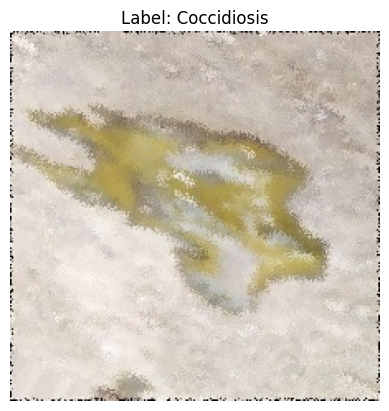

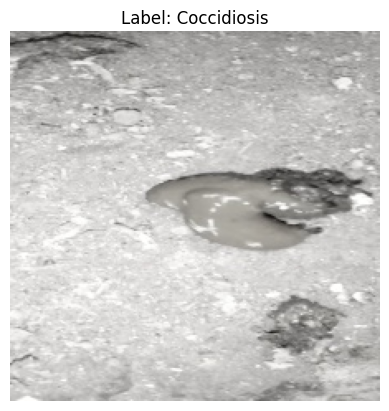

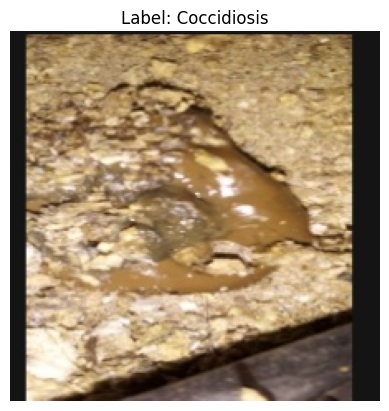

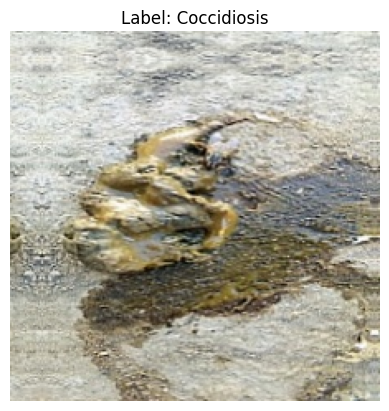

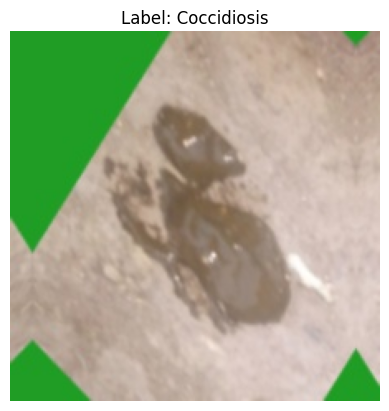

In [59]:


for i in range(5):
    plt.imshow(cv2.cvtColor(train_data_images[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
    plt.show()
